(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[9053  103]
 [ 928  213]]
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.67      0.19      0.29      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



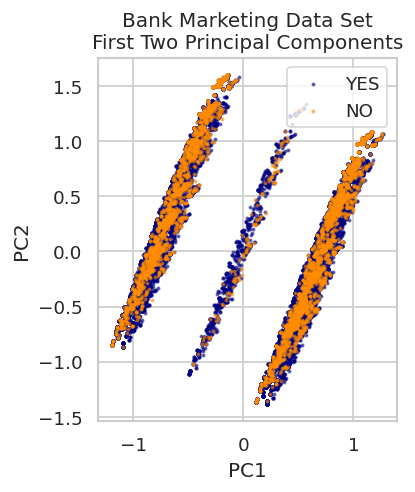

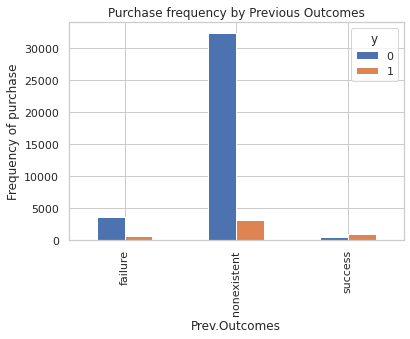

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

if __name__ == '__main__':

    data = pd.read_csv('banking.csv', header=0)
    data = data.dropna()
    print(data.shape)
    print(list(data.columns))

    # plot_data(data)

    # The prediction will be based on the variables selected in plot_data(), all other varaible are dropped

    data.drop(data.columns[[0, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

    # print(data.shape)
    # print(list(data.columns))

    # Data preprocessing

    """dummy varaiable are variables with only two values: one or zero."""

    data2 = pd.get_dummies(data, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome','month','education'])

    # drop the unknown columns
    data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)

    print(data2.columns)

    # plot the correlation between variables
    # sns.heatmap(data2.corr())
    # plt.show()

    # split the data into training and test sets
    X = data2.iloc[:, 1:]
    y = data2.iloc[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    print(X_train.shape)

    # Logistic Regression Model
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)

    # predicting the test results and confusion matrix
    y_pred = clf.predict(X_test)
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

    print('Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

    print(classification_report(y_test, y_pred))

    pca = PCA(n_components=2).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

    plt.figure(dpi=120)
    plt.scatter(pca[y.values == 0, 0], pca[y.values == 0, 1], alpha=0.5, label='YES', s=2, color='navy')
    plt.scatter(pca[y.values == 1, 0], pca[y.values == 1, 1], alpha=0.5, label='NO', s=2, color='darkorange')
    plt.legend()
    plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.gca().set_aspect('equal')
    plt.show()
   
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase frequency by Job title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_job')

%matplotlib inline
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_ms')

%matplotlib inline
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase frequency by Previous Outcomes')
plt.xlabel('Prev.Outcomes')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_pout')

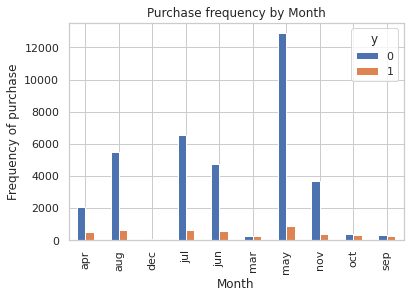

In [18]:
%matplotlib inline
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_mnt')

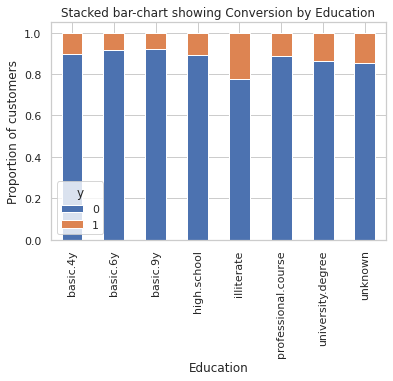

In [19]:
%matplotlib inline
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_edu')